In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from jupyterthemes import jtplot

step= 0.1

def setStep(s):
    step=s 

def setupH():
    setStep(0.1)
    #jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False)
    #
    mpl.rcParams['figure.dpi']=500
    mpl.rcParams['figure.figsize']=[16/2.54,9/2.54]
    mpl.rcParams['lines.linewidth']=0.75

def f(g, x):
    return np.cos(x)+(1/g)*np.power(x/np.pi,2)
setupH()

In [2]:
setupH()

<function matplotlib.pyplot.show(*args, **kw)>

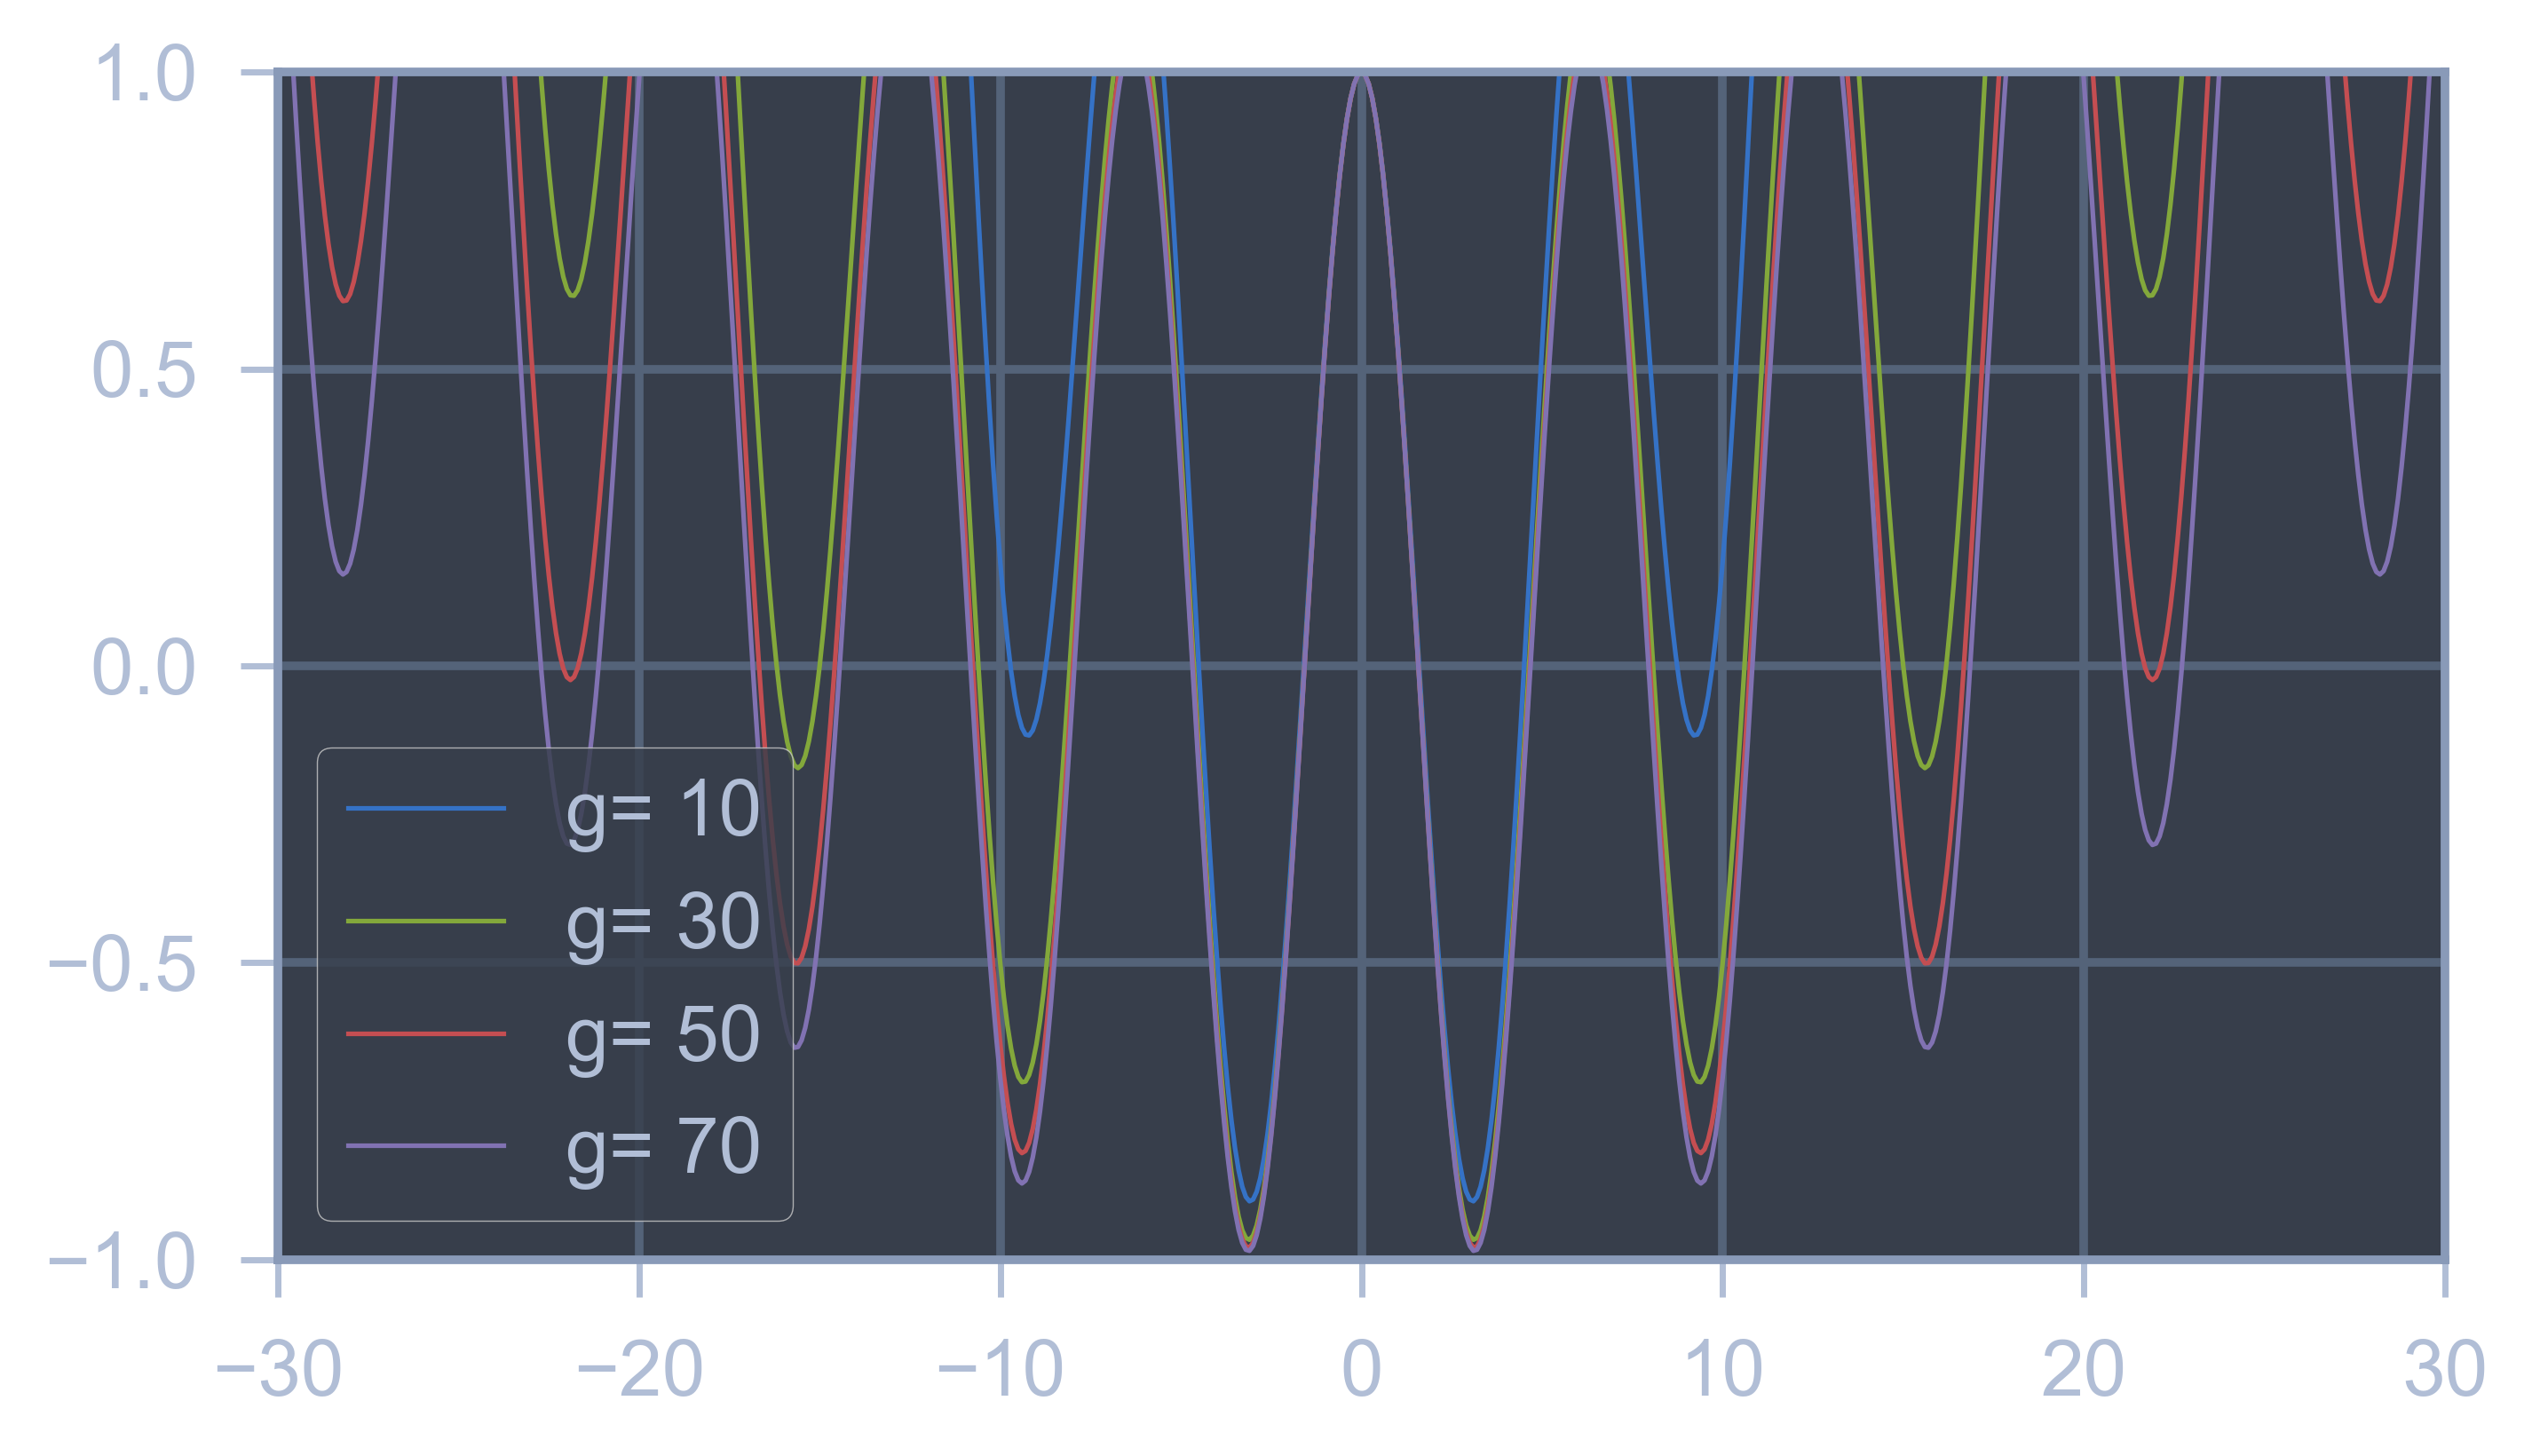

In [3]:
setupH()
X= np.arange(-30,30,step)
for i in range(10,90,20):
    plt.plot(X,f(i,X), label="g= "+str(i))
plt.grid()
plt.ylim(-1,1)
plt.xlim(-30,30)
plt.legend()
plt.show

In [4]:
setupH()

def N_zeros(g):
    anz=0
    X=np.arange(-30,30,step)
    for n in X:
        pmCheck= f(g,n)*f(g,n+step)
        if pmCheck<0:
            anz+=1 
    return anz
N_zeros(10)

8

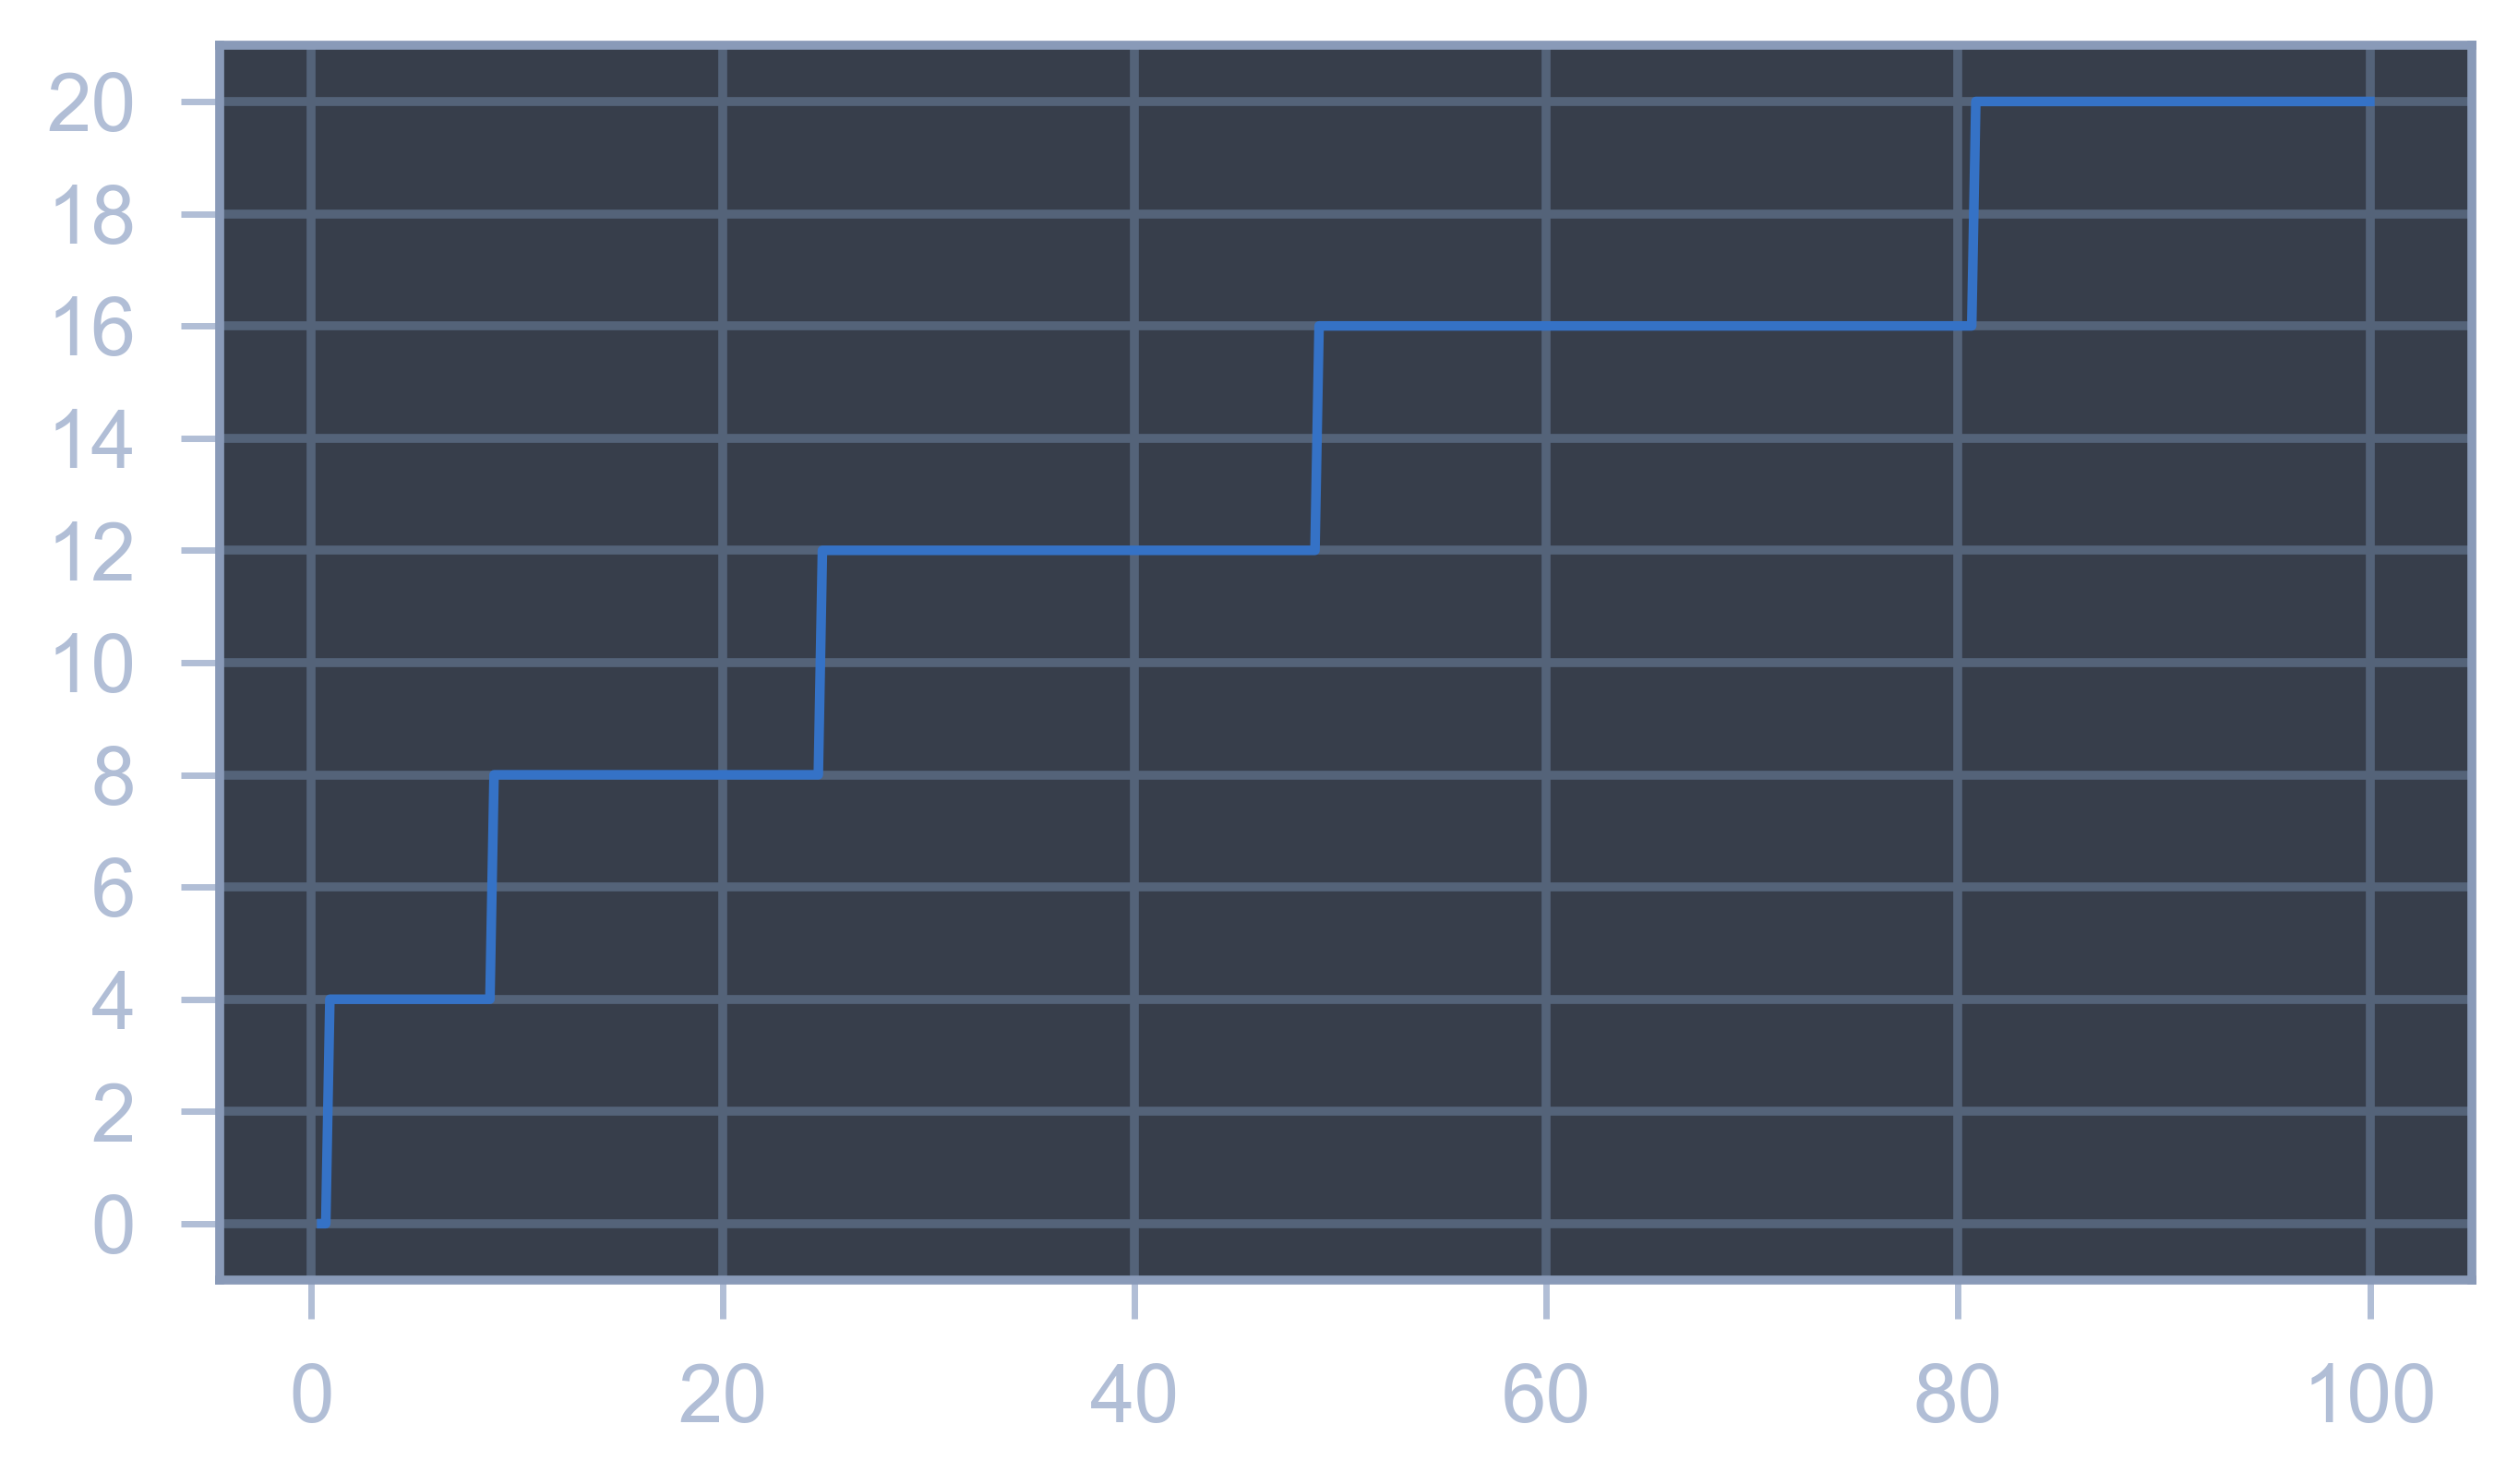

In [5]:
g_min=0.5
g_max=100.0
Ng=500

g_values=np.linspace(g_min, g_max, num=Ng)
Nz_values= np.empty(Ng)

for i in range(1, Ng):
    Nz_values[i]= N_zeros(g_values[i])
plt.yticks(np.arange(0,22,2))
plt.grid()
plt.plot(g_values, Nz_values,lw=1.5)

In [6]:
from __future__ import print_function
setupH()

def dec2dual(M):
    val= []
    while M!=0:
        val.append(M%2)
        M= math.floor(M/2)
    return val[::-1]

def stringyfy(l):
    s=""
    for i in range(0,len(l)):
        s+=str(l[i])
    return s

for n in [2, 17, 41, 1024, 5555]:
    print(n," = ["+stringyfy(dec2dual(n))+"]_2")

2  = [10]_2
17  = [10001]_2
41  = [101001]_2
1024  = [10000000000]_2
5555  = [1010110110011]_2


In [7]:
setupH()

def x2cf(x,N):
    a= np.empty(N+1,dtype=np.int64)
    a[0]= math.floor(x)
    for i in range(1,N+1):
        x=(x-a[i-1])**(-1)
        a[i]= math.floor(x)
    return a

def cf2q(cf):
    if cf.size==1:
        return cf[0]
    else:
        return cf[0]+1/cf2q(cf[1::])
    
def analyze(num,N=3):
    print("Eingabe: "+str(num))
    cf=x2cf(num,N)
    print("Kettenbruchkoeffizienten: "+str(cf))
    q=cf2q(cf)
    print("q_"+str(N)+": "+str(q))
    relAbw= np.abs(q/num-1)
    print("relative Abweichung: "+ str(relAbw))
    return 

analyze(math.pi,10)

Eingabe: 3.141592653589793
Kettenbruchkoeffizienten: [  3   7  15   1 292   1   1   1   2   1   3]
q_10: 3.141592653589389
relative Abweichung: 1.2867484855405564e-13
